# **Informe comparativo sobre algoritmos en Java y Python**

In [67]:
# Importacion de modulos requeridos

# Manejo de datos en CSV
import pandas as pd

# Graficas
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv           



In [68]:
# Leer el CSV
df_python_results = pd.read_csv('../NPC_SUB_DIGRAFH_PYTHON_CODE/results.csv', sep=';', encoding='utf-8')
df_java_results = pd.read_csv('../NPC_SUB_DIGRAFH_JAVA_CODE/results.csv', sep=';', encoding='utf-8')

## **Verificación de que los datos fueron cargados correctamente**

In [69]:
# Ver las primeras filas
print(df_python_results.head(10))

print('-----------------------------------')
print('Datos Java')
print(df_java_results.head(2))

   seed vertices                                            aristas   n  k  \
0    42  [1...2]                                                 []   0  0   
1    43  [1...1]                                                 []   0  0   
2    44  [1...7]  [(1, 7), (1, 2), (1, 3), (1, 4), (1, 6), (1, 5...  16  3   
3    45  [1...5]   [(1, 3), (1, 4), (1, 2), (2, 3), (2, 4), (4, 5)]   6  3   
4    46  [1...2]                                           [(1, 2)]   1  0   
5    47  [1...6]                                   [(2, 6), (2, 5)]   2  1   
6    48  [1...9]  [(1, 7), (1, 6), (1, 5), (1, 9), (1, 8), (2, 7...  20  4   
7    49  [1...2]                                           [(1, 2)]   1  1   
8    50  [1...8]  [(1, 4), (1, 6), (1, 7), (1, 3), (1, 5), (1, 8...  27  8   
9    51  [1...4]   [(1, 3), (1, 2), (1, 4), (2, 4), (2, 3), (3, 4)]   6  4   

   tiempo BF  ops BF tiempo DC  ops DC  tiempo BT  ops BT  
0   0.000090       0  0.000072       0   0.000040       0  
1   0.000080       0 

In [70]:
df_python_results.info()
df_java_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seed       10 non-null     int64  
 1   vertices   10 non-null     object 
 2   aristas    10 non-null     object 
 3   n          10 non-null     int64  
 4   k          10 non-null     int64  
 5   tiempo BF  10 non-null     float64
 6   ops BF     10 non-null     int64  
 7   tiempo DC  10 non-null     object 
 8   ops DC     10 non-null     int64  
 9   tiempo BT  10 non-null     float64
 10  ops BT     10 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1012.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vertices   10 non-null     object 
 1   aristas    10 non-null     object 
 2   n          10 non-null     int64  
 3   k   

## **Graficas comparativas para Python**

### **Grafica numero de operaciones por algoritmo**

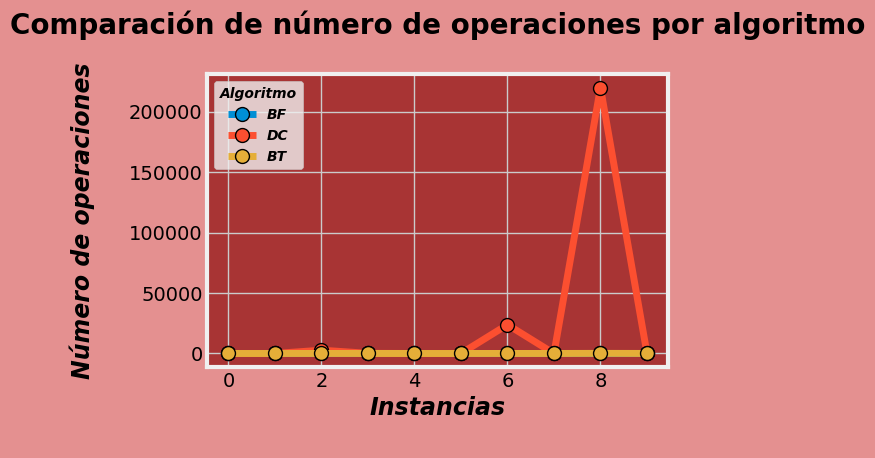

In [71]:
# Asegurarse de que las columnas numéricas sean realmente numéricas
df = df_python_results.copy()           
ycols = ["ops BF", "ops BT"]            # columnas sin NaN


plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()

fig.patch.set_facecolor("#E49090")   # fondo exterior
ax.set_facecolor("#A83434")          # fondo del área de dibujo

# Preparamos el eje X (una posición por instancia)
x = np.arange(len(df))              # 0, 1, …, 9


# Dibujamos
ax.plot(x, df_python_results["ops BF"], marker="o", label="BF", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Brute-Force
ax.plot(x, df_python_results["ops DC"], marker="o", label="DC", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Divide & Conquer
ax.plot(x, df_python_results["ops BT"], marker="o", label="BT", linewidth = 5, markersize=10, markeredgecolor = 'black')   # Backtracking


# — Marcador para cada TIMEOUT —
mask_to = df["ops DC"].isna()
if mask_to.any():
    # 3a) Obtén los límites tras trazar las curvas
    ymin, ymax = ax.get_ylim()
    
    # 3b) Coloca la marca un 5 % por encima del límite superior actual
    y_to = ymax + 0.05*(ymax - ymin)
    
    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,              # grande
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")
    
    # 3c) Amplía el eje Y para que la marca quede dentro de la vista
    ax.set_ylim(top=y_to + 0.05*(ymax - ymin))      # deja espacio para las X
    

# Etiquetas, título y leyenda
ax.set_xlabel("Instancias\n", fontsize=17, fontstyle='italic', fontweight = 'bold')
ax.set_ylabel("Número de operaciones\n", fontsize=17, fontstyle='italic', fontweight = 'bold')
ax.set_title("Comparación de número de operaciones por algoritmo\n", fontsize=20, fontweight='bold')
legend = ax.legend(title="Algoritmo", prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                                     title_fontsize=10)
# Aplicar estilo al título manualmente
legend.get_title().set_fontstyle('italic')
legend.get_title().set_fontweight('bold')


# Si prefieres usar el número de *seed* en el eje X:
#ax.set_xticks(x)
#ax.set_xticklabels(df_python_results["seed"])

plt.tight_layout()
plt.show()

#### **Número de operaciones en escala logaritmica**

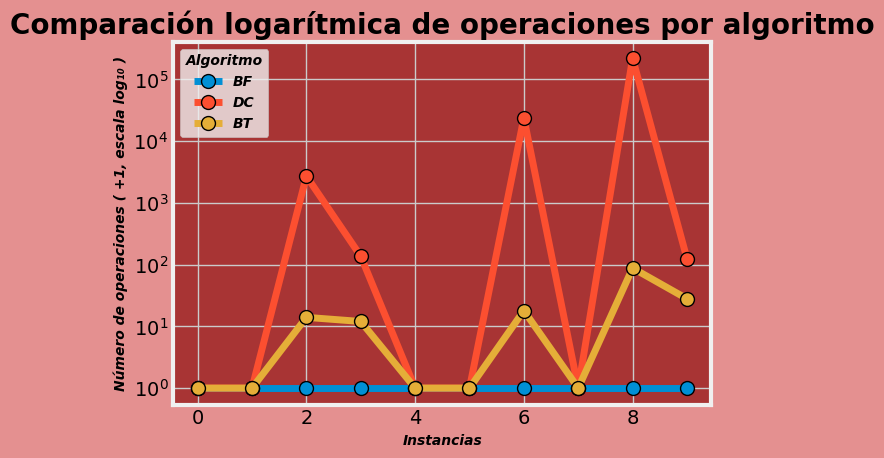

In [72]:
df = df_python_results.copy()

# TIMEOUT → NaN
df["ops DC"] = pd.to_numeric(df["ops DC"], errors="coerce")

# Para log(·), evitamos ceros sumando 1
for col in ["ops BF", "ops DC", "ops BT"]:
    df[col] = df[col] + 1            # 0 → 1   (no altera la escala relativa)

x = np.arange(len(df))               # 0..n-1

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")
ax.set_facecolor("#A83434")

# ──────────────── 2)  Curvas ────────────────
ax.plot(x, df["ops BF"], marker="o", label="BF",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["ops DC"], marker="o", label="DC",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["ops BT"], marker="o", label="BT",
        linewidth=5, markersize=10, markeredgecolor="black")

# Escala logarítmica en Y
ax.set_yscale("log")

# ──────────────── 3)  Marcador TIMEOUT ────────────────
mask_to = df["ops DC"].isna()
if mask_to.any():
    ymin, ymax = ax.get_ylim()                 # ya en escala log
    y_to = ymax * 1.2                          # 20 % por encima

    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")

    ax.set_ylim(top=y_to * 1.05)               # deja hueco visible

# ──────────────── 4)  Texto y leyenda ────────────────
ax.set_xlabel("Instancias", fontsize=10, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Número de operaciones ( +1, escala log₁₀ )",
              fontsize=10, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de operaciones por algoritmo",
             fontsize=20, fontweight="bold")

legend = ax.legend(title="Algoritmo",
                   prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                   title_fontsize=10)

legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.show()

### **Grafica tiempo tomado por algoritmo**

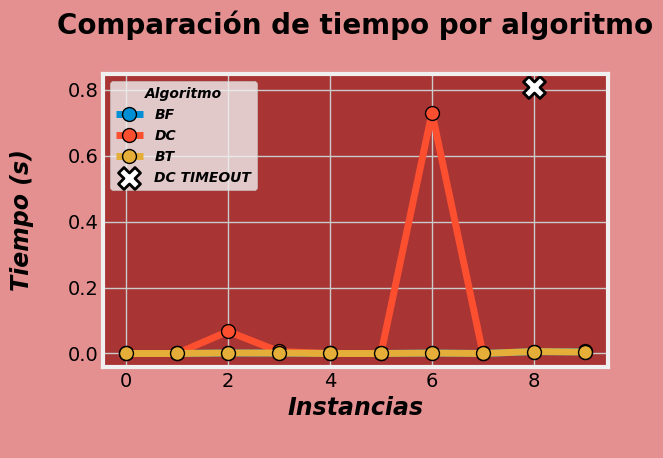

In [73]:
df = df_python_results.copy()

# Asegúrate de que sólo la columna 'tiempo DC' contenga TIMEOUT como string
df["tiempo DC"] = pd.to_numeric(df["tiempo DC"], errors="coerce")

plt.style.use("fivethirtyeight")

# ───────────────────────────────────────────────────────────────
# 2)  Gráfico base y colores de fondo (opcional)
# ───────────────────────────────────────────────────────────────
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")        # contorno exterior
ax.set_facecolor("#A83434")              # área del gráfico

x = np.arange(len(df))                   # 0, 1, …, n-1

# ───────────────────────────────────────────────────────────────
# 3)  Curvas de tiempo (anchas y con borde en el marcador)
# ───────────────────────────────────────────────────────────────
ax.plot(x, df["tiempo BF"], marker="o", label="BF",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["tiempo DC"], marker="o", label="DC",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["tiempo BT"], marker="o", label="BT",
        linewidth=5, markersize=10, markeredgecolor="black")

# ───────────────────────────────────────────────────────────────
# 4)  Marcador de TIMEOUT (donde tiempo DC es NaN)
# ───────────────────────────────────────────────────────────────
mask_to = df["tiempo DC"].isna()
if mask_to.any():
    ymin, ymax = ax.get_ylim()                       # tras dibujar las curvas
    y_to = ymax + 0.05*(ymax - ymin)                 # 5 % por encima

    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")

    ax.set_ylim(top=y_to + 0.05*(ymax - ymin))       # deja hueco para las X

# ───────────────────────────────────────────────────────────────
# 5)  Etiquetas, título y leyenda
# ───────────────────────────────────────────────────────────────
ax.set_xlabel("Instancias\n",
              fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s)\n",
              fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación de tiempo por algoritmo\n",
             fontsize=20, fontweight="bold")

legend = ax.legend(title="Algoritmo",
                   prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                   title_fontsize=10)

legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

# Si quieres los seed como etiquetas del eje X:
# ax.set_xticks(x)
# ax.set_xticklabels(df["seed"])

plt.tight_layout()
plt.show()

#### **Tiempo tomado por el algoritmo (Escala algoritmica)**

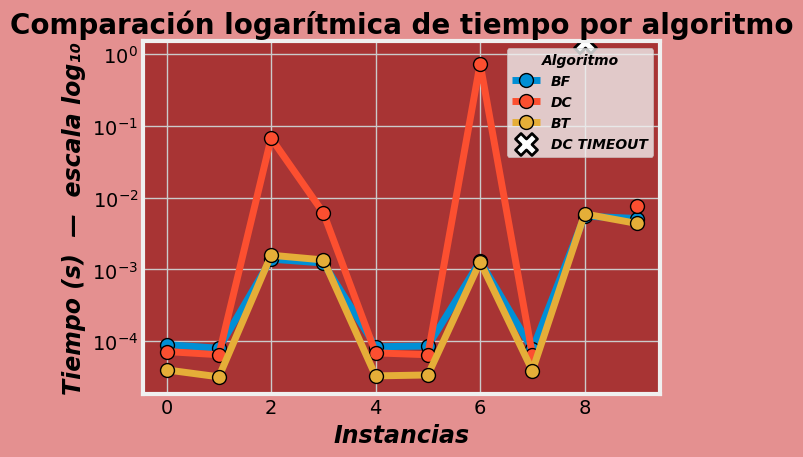

In [74]:
df = df_python_results.copy()

# Convierto la columna que puede traer la palabra "TIMEOUT"
df["tiempo DC"] = pd.to_numeric(df["tiempo DC"], errors="coerce")

# Para prevenir log(0), sumo un epsilon pequeñísimo a cualquier cero real
EPS = 1e-9
for col in ["tiempo BF", "tiempo DC", "tiempo BT"]:
    df[col] = pd.to_numeric(df[col], errors="coerce") + EPS

# Eje X
x = np.arange(len(df))                     # 0, 1, …​, n-1

# ───────────────────────────────────────────────────────────────
# 2)  Estilo y fondos
# ───────────────────────────────────────────────────────────────
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
fig.patch.set_facecolor("#E49090")         # contorno exterior
ax.set_facecolor("#A83434")                # área de dibujo

# ───────────────────────────────────────────────────────────────
# 3)  Curvas de tiempo
# ───────────────────────────────────────────────────────────────
ax.plot(x, df["tiempo BF"], marker="o", label="BF",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["tiempo DC"], marker="o", label="DC",
        linewidth=5, markersize=10, markeredgecolor="black")
ax.plot(x, df["tiempo BT"], marker="o", label="BT",
        linewidth=5, markersize=10, markeredgecolor="black")

# Escala logarítmica
ax.set_yscale("log")

# ───────────────────────────────────────────────────────────────
# 4)  Marcador de TIMEOUT (donde tiempo DC es NaN)
# ───────────────────────────────────────────────────────────────
mask_to = df["tiempo DC"].isna()
if mask_to.any():
    # Límites tras trazar las curvas (ya en log)
    ymin, ymax = ax.get_ylim()
    y_to = ymax * 1.2                      # 20 % por encima

    ax.scatter(x[mask_to], np.full(mask_to.sum(), y_to),
               marker="X", s=250,
               facecolor="white", edgecolor="black", linewidth=2,
               label="DC TIMEOUT")

    ax.set_ylim(top=y_to * 1.05)          # deja hueco para las X

# ───────────────────────────────────────────────────────────────
# 5)  Texto y leyenda
# ───────────────────────────────────────────────────────────────
ax.set_xlabel("Instancias", fontsize=17,
              fontstyle="italic", fontweight="bold")
ax.set_ylabel("Tiempo (s)  —  escala log₁₀",
              fontsize=17, fontstyle="italic", fontweight="bold")
ax.set_title("Comparación logarítmica de tiempo por algoritmo",
             fontsize=20, fontweight="bold")

legend = ax.legend(title="Algoritmo",
                   prop={'size': 10, 'style': 'italic', 'weight': 'bold'},
                   title_fontsize=10)
legend.get_title().set_fontstyle("italic")
legend.get_title().set_fontweight("bold")

# Si prefieres las seed como etiquetas del eje X:
# ax.set_xticks(x)
# ax.set_xticklabels(df["seed"])

plt.tight_layout()
plt.show()

## **Grafica comparativa de tiempo Python vs Java**